In [2]:
cd /media/sf_datasets/Smarter\ Devices/BLUED_extracted/BLUED-TK

/media/sf_datasets/Smarter Devices/BLUED_extracted/BLUED-TK


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

sess = tf.InteractiveSession()

In [30]:
#reading the dataframe
df=pd.read_table('events/PQS.csv',index_col=0,sep='\t')

#converting the string to numpy array
df=df[df.device!=135]

In [31]:
inputs=3
layer1=100
#layer2=100
outputs=len(df.device.unique())

total_events=len(df)

x = tf.placeholder(tf.float32, shape=[None, inputs])
y = tf.placeholder(tf.float32, shape=[None, outputs])


W = tf.Variable(tf.zeros([inputs,outputs]))
b = tf.Variable(tf.zeros([outputs]))

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([inputs, layer1])),
    #'h2' :tf.Variable(tf.random_normal([layer1, layer2])),
    'ho' :tf.Variable(tf.random_normal([layer2, outputs])),    
}

biases = {
    'b1': tf.Variable(tf.random_normal([layer1])),
   # 'b2': tf.Variable(tf.random_normal([layer2])),
    'bo': tf.Variable(tf.random_normal([outputs])),

}



In [32]:
#output layer
def ann(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #layer2=tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
    out_layer = tf.add(tf.matmul(layer1, weights['ho']), biases['bo'])
    return out_layer
    
pred = ann(x, weights, biases)

In [33]:
feature_matrix=np.empty((total_events,inputs))
label_matrix=np.zeros((total_events,outputs))

ll=np.empty((total_events))
count=0
for i in df.index:
        feature_matrix[count]=[df.loc[i].p,df.loc[i].q,df.loc[i].s]
        ll[count]=df.loc[i].device
        count+=1

#  1 hot vector
device_list=list(df.device.unique())
for i in range(0,len(ll)):
    label_matrix[i,device_list.index(ll[i])]=1
print(feature_matrix.shape)
print(label_matrix.shape)

(2261, 3)
(2261, 33)


In [34]:
temp=df.groupby('device').count()
temp

,p,q,s
device,,,
101,24,24,24
102,23,23,23
103,24,24,24
108,16,16,16
111,583,583,583
112,8,8,8
118,43,43,43
120,14,14,14
123,32,32,32


103 -> 11


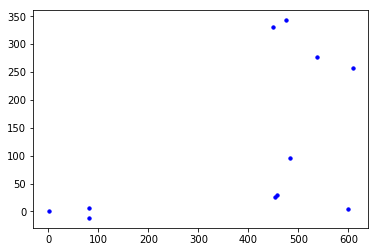

204 -> 21


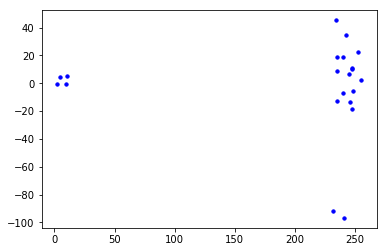

148 -> 3


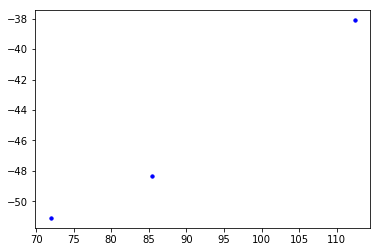

207 -> 20


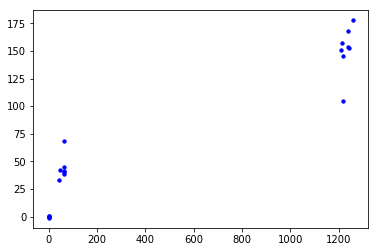

140 -> 70


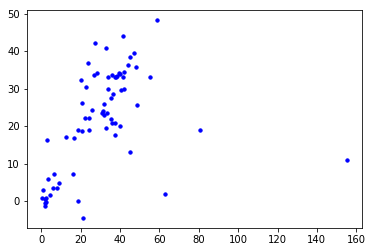

128 -> 37


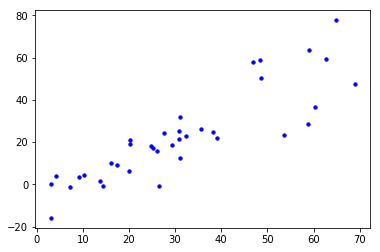

155 -> 28


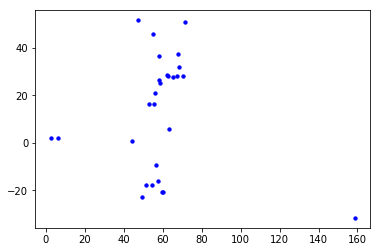

111 -> 298


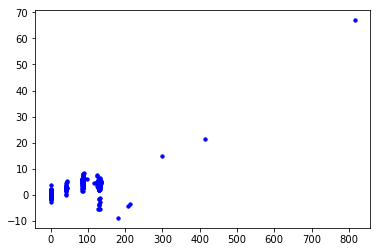

118 -> 21


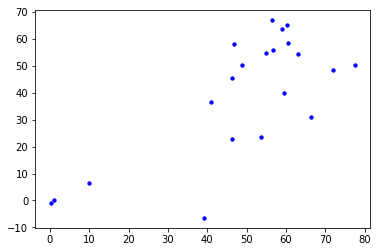

123 -> 16


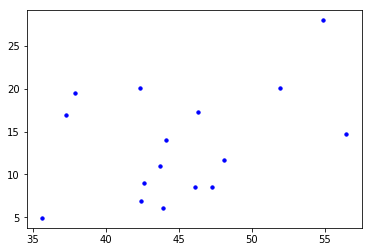

156 -> 40


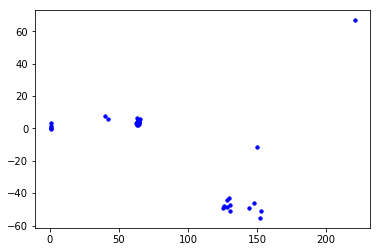

120 -> 9


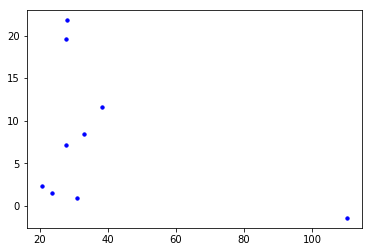

159 -> 19


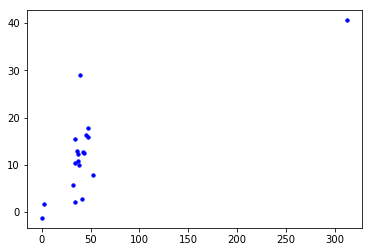

152 -> 28


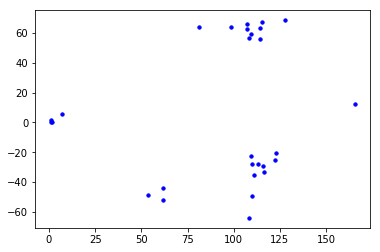

108 -> 8


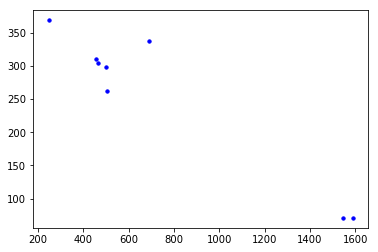

129 -> 29


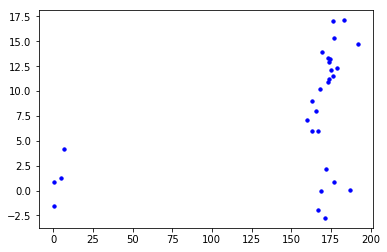

127 -> 9


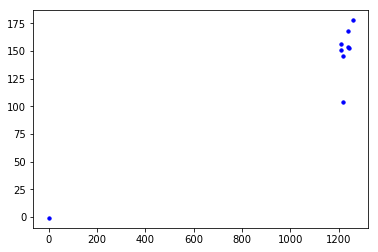

131 -> 77


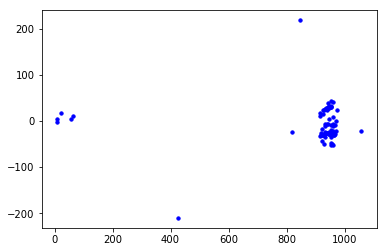

210 -> 45


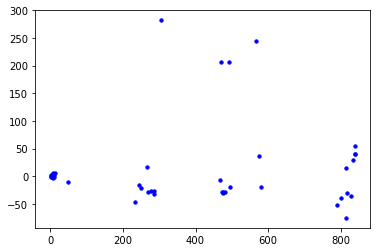

158 -> 11


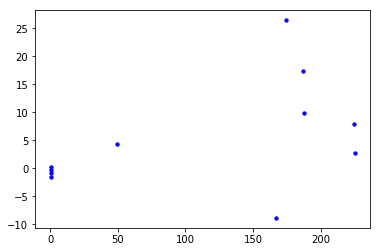

211 -> 198


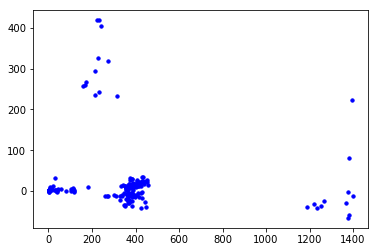

209 -> 21


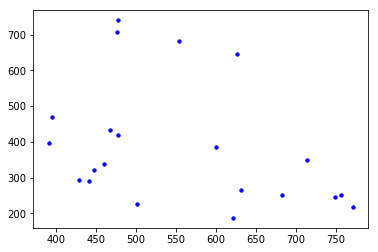

147 -> 8


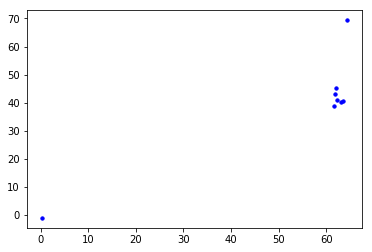

101 -> 13


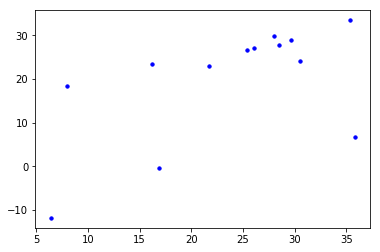

157 -> 15


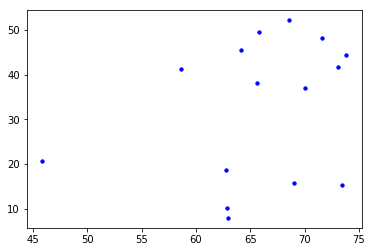

149 -> 26


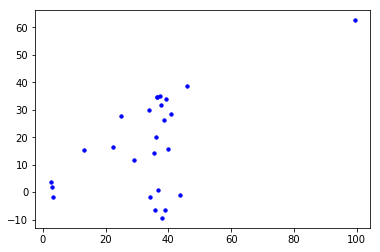

102 -> 12


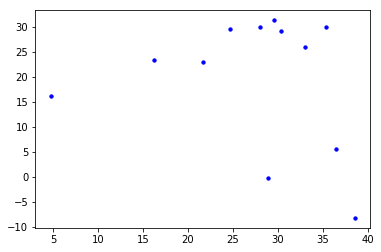

153 -> 3


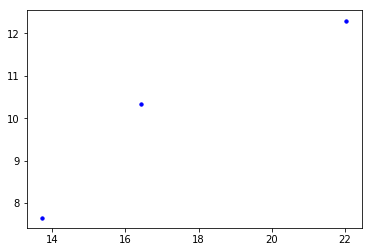

151 -> 9


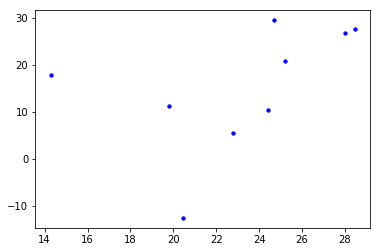

134 -> 17


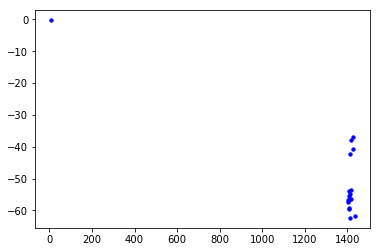

132 -> 4


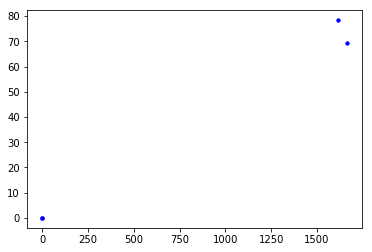

150 -> 9


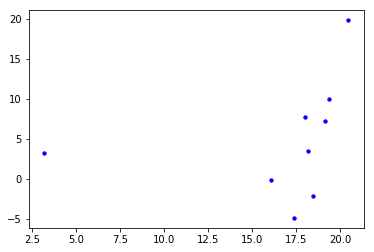

112 -> 5


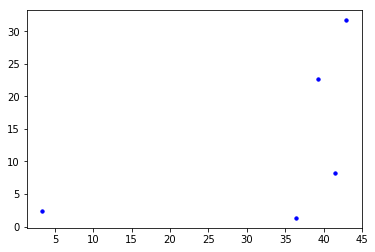

In [47]:
pqs=[]
devices=[]
for d in df.device.unique():
#     print(d)
    temp=df[df.device==d]
    temp=temp[temp.p>0]
    plt.scatter(temp.p,temp.q,s=11, c='b', label='device')
    print(d,'->',len(temp))
    plt.show()

In [20]:
# Parameters
learning_rate = 0.003
training_epochs = 500
display_step = training_epochs/10

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        _, c = sess.run([optimizer, cost], feed_dict={x: feature_matrix,
                                                      y: label_matrix})
        avg_cost = c 
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        if not epoch%display_step:
            print ("Accuracy:%f" %(accuracy.eval({x: feature_matrix, y: label_matrix})*100))

Accuracy:1.193107
Accuracy:5.037561
Accuracy:6.363234
Accuracy:8.484312
Accuracy:11.091471
Accuracy:7.291206
Accuracy:7.291206
Accuracy:6.849314
Accuracy:12.063632
Accuracy:12.682280
